In [3]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species'], header=None)
iris = iris.dropna()

In [87]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def pairs_regr(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
            
                X_train, X_test, y_train, y_test = train_test_split(data[col2], data[col1], test_size=0.4, random_state=0)
                X_train = X_train.values.reshape(-1, 1)
                y_train = y_train.values.reshape(-1, 1)
                X_test = X_test.values.reshape(-1, 1)
                y_test = y_test.values.reshape(-1, 1)
                regr = linear_model.LinearRegression()
                regr.fit(X_train, y_train)
                    
                print("Model No.%d: " %i + "X = %s, " %col2 + "Y = %s" %col1)
                # The coefficients
                print("Coefficients: \n", regr.coef_)
                # The mean squared error
                print("Mean squared error: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
                # Explained variance score: 1 is perfect prediction
                print('Variance score: %.2f' % regr.score(X_test, y_test))
                    
                ax.plot(X_test, regr.predict(X_test), color='blue', linewidth=3)


                #t = plt.title(name)
                                                                      
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


Model No.2: X = Sepal_Width, Y = Sepal_Length
('Coefficients: \n', array([[-0.15020227]]))
Mean squared error: 0.52
Variance score: 0.02
Model No.3: X = Petal_Length, Y = Sepal_Length
('Coefficients: \n', array([[ 0.42800791]]))
Mean squared error: 0.19
Variance score: 0.64
Model No.4: X = Petal_Width, Y = Sepal_Length
('Coefficients: \n', array([[ 0.93625544]]))
Mean squared error: 0.24
Variance score: 0.55
Model No.5: X = Sepal_Length, Y = Sepal_Width
('Coefficients: \n', array([[-0.03465428]]))
Mean squared error: 0.20
Variance score: -0.05
Model No.7: X = Petal_Length, Y = Sepal_Width
('Coefficients: \n', array([[-0.0784496]]))
Mean squared error: 0.15
Variance score: 0.19
Model No.8: X = Petal_Width, Y = Sepal_Width
('Coefficients: \n', array([[-0.160276]]))
Mean squared error: 0.17
Variance score: 0.11
Model No.9: X = Sepal_Length, Y = Petal_Length
('Coefficients: \n', array([[ 1.88894232]]))
Mean squared error: 0.89
Variance score: 0.64
Model No.10: X = Sepal_Width, Y = Petal_Le

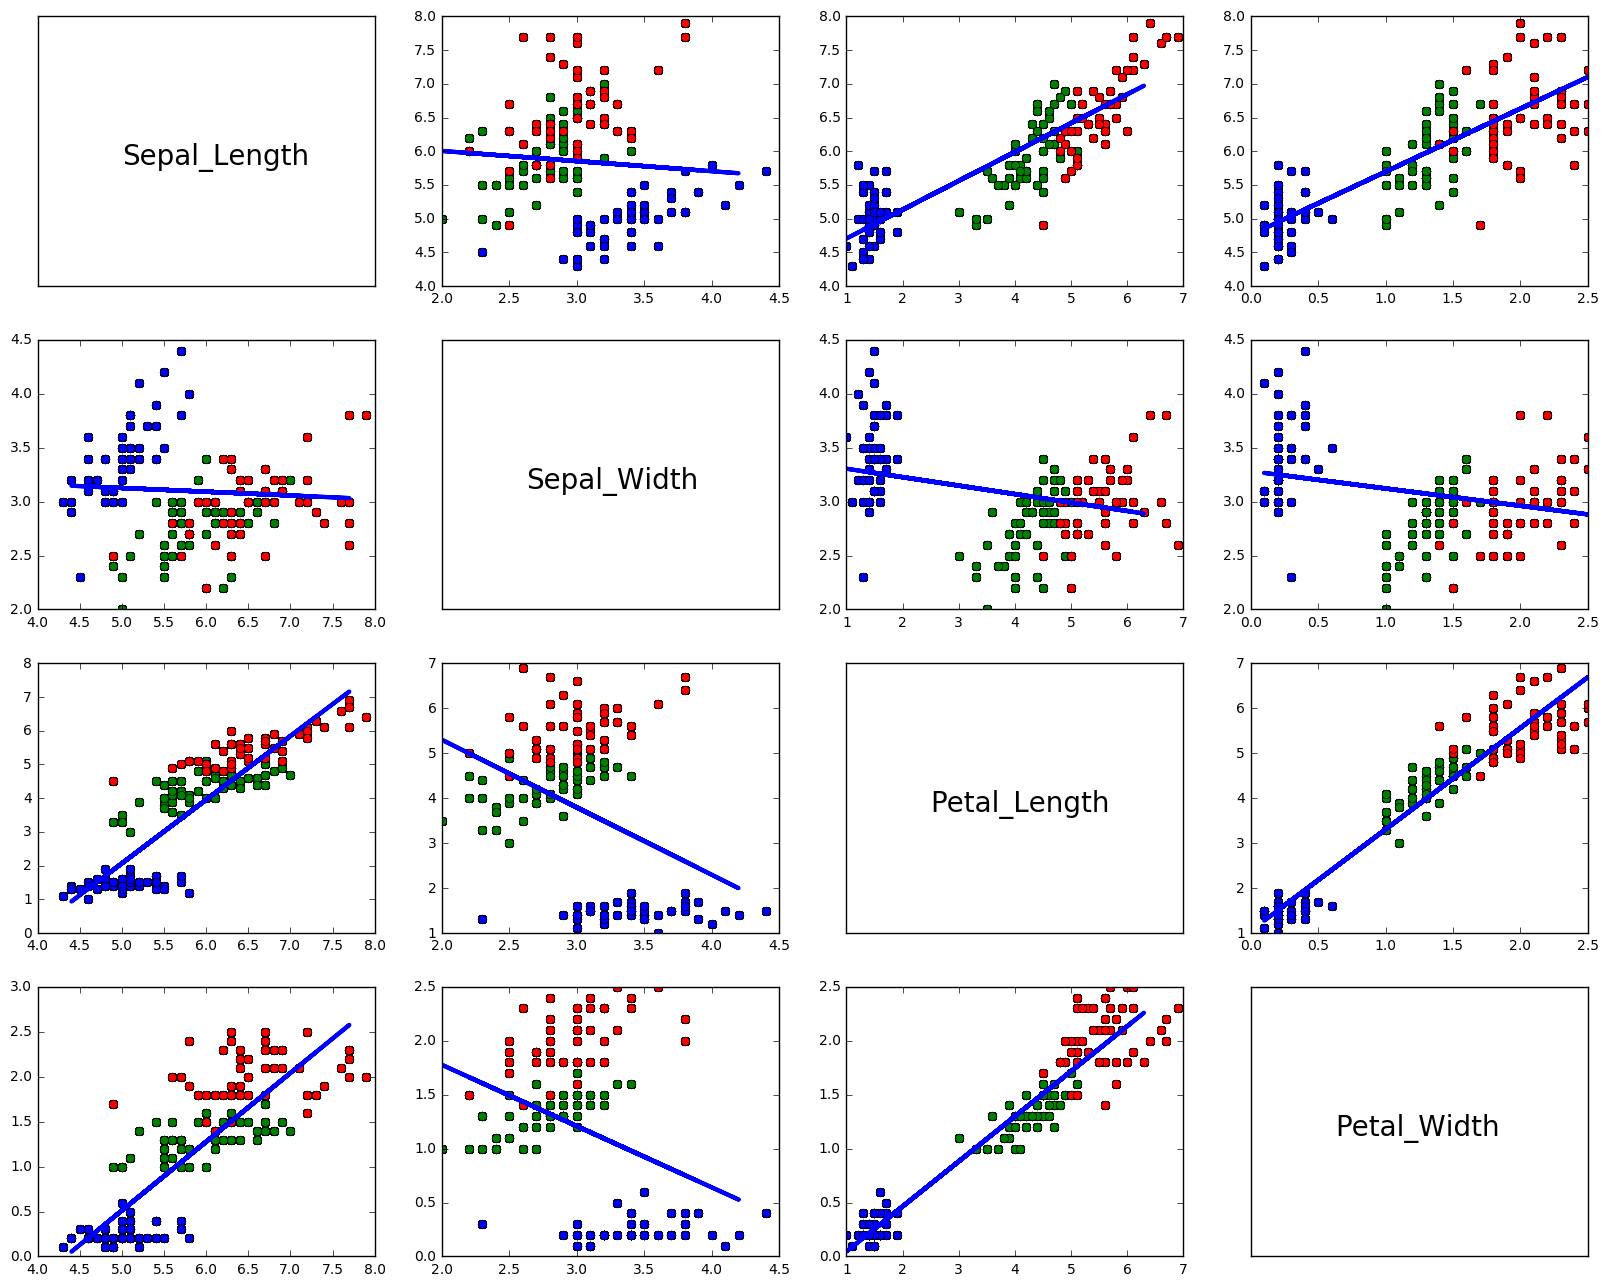

In [88]:
pairs_regr(iris)

### Among the models based on single linear regression, the model with "Petal_Length" as the independent variable and "Petal_Width" as the dependent variable seems to be the best one. This model has the lowest mean squared error (0.05).

In [110]:
# Multiple Linear Regression
# Xs: Sepal_Width, Petal_Length, Petal_Width
# Y: Sepal_Length
X_train, X_test, y_train, y_test = train_test_split(iris.ix[:, [1,2,3]], iris.ix[:, 0], test_size=0.4, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
                    
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.60496537,  0.76838235, -0.70098978]))
Mean squared error: 0.12
Variance score: 0.77


In [111]:
# Multiple Linear Regression
# Xs: Sepal_Length, Petal_Length, Petal_Width
# Y: Sepal_Width
X_train, X_test, y_train, y_test = train_test_split(iris.ix[:,[0,2,3]], iris.ix[:,1], test_size=0.4, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
                    
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.67497783, -0.63796085,  0.64762315]))
Mean squared error: 0.09
Variance score: 0.54


In [112]:
# Multiple Linear Regression
# Xs: Sepal_Length, Sepal_Width, Petal_Width
# Y: Petal_Length
X_train, X_test, y_train, y_test = train_test_split(iris.ix[:,[0,1,3]], iris.ix[:,2], test_size=0.4, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
                    
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.74367265, -0.55340039,  1.47199359]))
Mean squared error: 0.13
Variance score: 0.95


In [113]:
# Multiple Linear Regression
# Xs: Sepal_Length, Sepal_Width, Petal_Length
# Y: Petal_Width
X_train, X_test, y_train, y_test = train_test_split(iris.ix[:,[0,1,2]], iris.ix[:,3], test_size=0.4, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
                    
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([-0.24921784,  0.20636252,  0.54071564]))
Mean squared error: 0.05
Variance score: 0.90


### Among the models based on multiple linear regression, the model with "Sepal_Length", "Sepal_Width", and "Petal_Length" as Xs and "Petal_Width" as Y seems to be the best one. Its mean squared error is 0.05. The performance of this model is expected since the "Petal_Length" feature itself can predict the "Petal_Width" feature pretty well already, as illustrated in previous analysis.

## Question 1
### Among the 12 models generated on each pairwise combination of features, the best model is the one (Model No. 15) where "Petal_Length" is the predictor (independent) variable and "Petal_Width" is the dependent variable. The mean squared error of this model is 0.05, and the variance score is 0.89. Therefore, "Petal_Length" appears to be most predictive for "Petal_Width".

## Question 2
### The removing of feature "Petal_Width" would not affect the classification performance because feature "Petal_Width" could be predicted from feature "Petal_Length". Thus the inclusion of feature "Petal_Width" does not provide any additional information to the dataset. Hence, the removal of it would not affect the classification performance.